# Stoneburner, Kurt
- ## DSC 530 - Week05
- ## Chapter 5, Exercise 1


In [11]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [12]:
# //*** Imports and Load Data
#import markdown
import nsfg
import thinkstats2
import thinkplot
import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import analytic
import scipy

#resp = nsfg.ReadFemResp()
#preg = nsfg.ReadFemPreg()



**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [13]:
# //*** scipy.stats.norm returns a normal distribution
# //*** The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)

#A "frozen random variable" can compute its mean and standard deviation.
#print(dist.mean(), dist.std())

#It can also evaluate its CDF. How many people are more than one standard deviation below the mean? About 16%
#dist.cdf(mu-sigma)

In [14]:
def inches_to_cm(defInput):
    # //****************************************************************
    # //*** Convert Inches to feet, because I can't do this in my head
    # //*** Expected input defInput: feet: Number of Feet to convert
    # //***                                Number of Inches to Convert
    # //***                                Returns Centimenters as int
    # //****************************************************************
    
    conversion_rate = 2.54
    
    total_cm = 0
    
    # //*** Convert feet to cm Feet * 12 * conversion_rate
    if 'feet' in defInput.keys():
        total_cm = total_cm + (defInput['feet'] * 12 * conversion_rate)
    # //*** Convert Inches by multiplying vallue by conversion rate
    if 'inches' in defInput.keys():
        total_cm =  total_cm + (defInput['inches'] * conversion_rate)
    
    return total_cm

In [15]:
# //*** Generate Min and Max height in cm.
minHeight = inches_to_cm({'feet':5,'inches':10})
maxHeight = inches_to_cm({'feet':6,'inches':1})

print(f"Min Height cm: {minHeight} Max Height cm: {maxHeight}")

# //*** Get the percentage of population that qualifies for the minimum height.
# //*** This finds everyone below the minimum, so subtract from 1 to get everyone
# //*** Above the minimum
minQualified = 1 - dist.cdf(minHeight)
# //*** Get the percentage of population that qualifies for the Maximum height.
maxQualified = dist.cdf(maxHeight)
print(f"{round(minQualified*100,4)}% is tall enough to join the Blue Man Group")
print(f"{round(maxQualified*100,4)}% is not too tall to join the Blue Man Group")
# //*** The answer in the maxHeight - minHeight
print(f"Estimated {round( (maxQualified - minQualified) * 100,4)}% of US male population is within the height range of 5'10\" - 6'1\"")

Min Height cm: 177.8 Max Height cm: 185.42
51.0361% is tall enough to join the Blue Man Group
83.2386% is not too tall to join the Blue Man Group
Estimated 32.2025% of US male population is within the height range of 5'10" - 6'1"


- ## Chapter 5, Exercise 2

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

**Plot this Distribution**

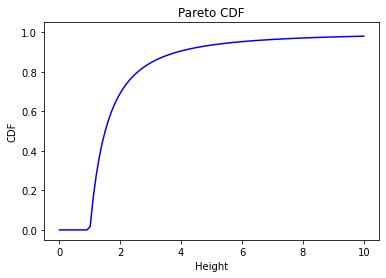

In [16]:
# //*** Generate a pareto CDF from a set of 100 numbers evenly incremented from 1 - 10.
heights = np.linspace(0,10,100)
pareto_cdf_series = pd.Series(index = scipy.stats.pareto.cdf(heights,scale=1, b=1.7), data=heights)

# //*** Histogram with matplotlib
plt.plot(pareto_cdf_series, pareto_cdf_series.index.values, 1, color='b')
plt.title("Pareto CDF")
plt.xlabel('Height')
plt.ylabel('CDF')
plt.show()

# //*** Raw Pareto Calculations to work out later
#xs = heights xmin = minimum alpha = 1,7
#calc_pareto = 1- (heights / 1) ** 1.7
#ps = 1 - (xs / xmin) ** -alpha
#ps = stats.pareto.cdf(xs, scale=xmin, b=alpha)


What is the mean human height in Pareto world?

**Mean human height in Pareto World is 2.428571428571429**

In [17]:
pareto_dist = scipy.stats.pareto(b=1.7, scale=1)
pareto_cdf_mean = pareto_dist.mean()
print(f"Mean human height in Pareto World is {pareto_cdf_mean}")

Mean human height in Pareto World is 2.428571428571429


What fraction of the population is shorter than the mean? 

**77.87396975652881% of the total population is shorter than the mean**

In [18]:
print(f"{pareto_dist.cdf(pareto_cdf_mean)*100}% of the total population is shorter than the mean")

77.87396975652881% of the total population is shorter than the mean


If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? 

**In Pareto World 55602 people out of 7 billon will be over 1km tall.**

In [19]:
# //*** Find the CDF of 1000m. Subtract from 1 to get everyone above.
# //*** Multiply time 7 Billion
pareto_giants = int( (1 - pareto_dist.cdf(1000)) * 7000000000)
print(f"In Pareto World {pareto_giants} people out of 7 billon will be over 1km tall.")

In Pareto World 55602 people out of 7 billon will be over 1km tall.


How tall do we expect the tallest person to be?

**The tallest person on Pareto World is expected to be 618350m**

In [67]:
# //*********************************************************************************************************
# //*** The solution is to find the CDF representation of one whole person.
# //*** The book uses the survivor function with a value of 600000
# //*** Neither the answer or the function are referenced. I could have used a ppf, but I didn't understand
# //*** that either.
# //*** So I put way too much effort into building a function to find the Pareto value closest to 1:
# //***                    f(x)~1 where [ population - distribution.cdf(x) * population ]
# //***
# //*** This function uses a little recursion to estimate a min / max range of a pareto distribution
# //*** Where the portion of the population is closest to 1 out of 7 billion.
# //*** Once range is determined, The minimum floor is raised to within 1% of the final answer.
# //*** A Brute force Loop is used to get the rest of the answer.
# //*** I tried Recursive Hi/Low to find the value but got stuck. Probably needed to define
# //*** a range that was close enough, then brute force the smaller range.
# //*** This works and has a more accurate value than the book.
# //*********************************************************************************************************
def pareto_max(dist,pop,counter=-1,maxCounter=-1):
    # //*** Initialize Counters on first pass
    # //*** Start with pop * .00001 as a population floor 
    if counter == -1:
        counter = pop * .00001
        maxCounter = counter * 1.5
    
    # //*** Is 1 Above our maxRange?
    minPareto = pop - dist.cdf(counter)* pop
    maxPareto = pop - dist.cdf(maxCounter)* pop
    #print(f"{counter} : {minPareto} {maxCounter} {maxPareto}")
    
    # //*** Is 1 Above our maxRange?
    if maxPareto > 1.0:
        # //*** 1 is not in our range. Set min to current Max and Double max
        return pareto_max(dist,pop,maxCounter,maxCounter*2)
    
    # //*** We have a target range counter ~ maxCounter
    # //*** I should be able to get the value with a Hi/Low recursion method.
    # //*** But i'm not that cool today. Using a brute force loop to get the value
    # //*** print(f"Target Range: {counter} {maxCounter} - Time to Brute Force: {maxCounter - counter} Values")
    
    # //*** Let's get the Range closer
    # //*** Quick Loop let's raise the floor in 1% increments to get a better starting place
    
    counterDifference = int(maxCounter - counter) # //*** Total Range
    counterInterval = 100 # //*** Increments
    counterIncrement = int(counterDifference / counterInterval) #//*** Incremental Counter
    loop_counter = int(counter) 
    
    # //*** Gets the Floor within 1% of the range, to simplify the Brute Force
    for x in range(1,counterInterval):
        loop_counter = loop_counter + counterIncrement
        loop_pareto = pop - dist.cdf(loop_counter)* pop
        if (loop_pareto > 1.0):
            counter = loop_counter
        else:
            break

    
    #print(f"New Counter Floor: {counter}")
    
    # //*** Loop to find the Pareto value closest to 1
    target_pareto = minPareto
    for x in range(int(counter), int(maxCounter)):
        loop_pareto = pop - dist.cdf(x)* pop
        if loop_pareto > 1.0:
            target_pareto = loop_pareto
            #print(f"{x} : {target_pareto}")
        else:
            #print(f"FOUND: {x} {target_pareto} {loop_pareto}")
            break
    
    return(x)
    

print(f"The tallest person on Pareto World is expected to be {pareto_max(pareto_dist,7000000000)}m ")

The tallest person on Pareto World is expected to be 618350m 


- ## Chapter 6, Exercise 1

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.



In [71]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [72]:
import hinc
income_df = hinc.ReadData()

In [73]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

TypeError: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

In [74]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

NameError: name 'log_sample' is not defined

In [ ]:
sample = np.power(10, log_sample)

In [ ]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?


- ## Chapter X, Exercise X



In [ ]:
# //*** CODE HERE